In [ ]:
#Fig 9A

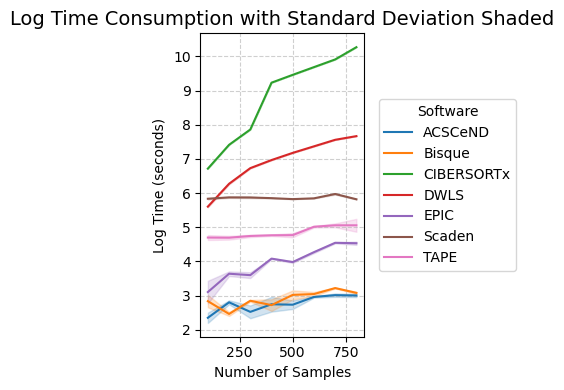

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the data
file_path = 'C:/Users/HP/Downloads/time_consumption.csv'
data = pd.read_csv(file_path, index_col=0)  # Assuming row names are in the first column

# Step 2: Log-transform the time values
log_data = np.log(data)

# Step 3: Calculate mean and standard deviation
mean_data = log_data.groupby(log_data.index).mean()
std_data = log_data.groupby(log_data.index).std()

# Step 4: Create a line plot with shaded SD area
plt.figure(figsize=(4, 4))
colors = plt.cm.tab10.colors  # Use a colormap for distinct colors

for i, software in enumerate(mean_data.index):
    # Plot mean line
    plt.plot(
        mean_data.columns.astype(int), 
        mean_data.loc[software], 
        label=software, 
        color=colors[i]
    )
    
    # Fill SD area
    plt.fill_between(
        mean_data.columns.astype(int),
        mean_data.loc[software] - std_data.loc[software],
        mean_data.loc[software] + std_data.loc[software],
        color=colors[i],
        alpha=0.2
    )

# Step 5: Customize the plot
plt.title('Log Time Consumption with Standard Deviation Shaded', fontsize=14)
plt.xlabel('Number of Samples', fontsize=10)
plt.ylabel('Log Time (seconds)', fontsize=10)
# Add legend outside the plot
plt.legend(
    title="Software", 
    loc="center left", 
    bbox_to_anchor=(1.05, 0.5)  # Adjust position to outside right, vertically centered
)
plt.grid(True, linestyle='--', alpha=0.6)

# Save the plot as an image
#output_path = r"C:\Users\HP\Downloads\Time_consumption.png"
#plt.savefig(output_path, dpi=1200, bbox_inches='tight')

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
#Fig 9B

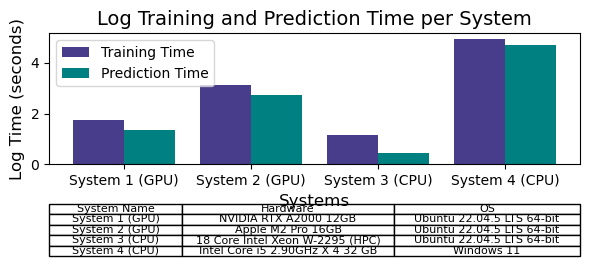

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Data
systems = ["System 1 (GPU)", "System 2 (GPU)", "System 3 (CPU)", "System 4 (CPU)"]
training_time = [5.818882942199707, 22.61, 3.13, 136.97]
prediction_time = [3.8916890621185303, 15.05, 1.57, 111.61]
details = [
    ["NVIDIA RTX A2000 12GB", "Ubuntu 22.04.5 LTS 64-bit"],
    ["Apple M2 Pro 16GB", "Ubuntu 22.04.5 LTS 64-bit"],
    ["18 Core Intel Xeon W-2295 (HPC)", "Ubuntu 22.04.5 LTS 64-bit"],
    ["Intel Core i5 2.90GHz X 4 32 GB", "Windows 11"],
]

# Log-transform the times
log_training_time = np.log(training_time)
log_prediction_time = np.log(prediction_time)

# Plot
fig, ax = plt.subplots(figsize=(6, 4))
bar_width = 0.4
x = np.arange(len(systems))

# Training time bars
train_bars = ax.bar(
    x - bar_width / 2,
    log_training_time,
    bar_width,
    label="Training Time",
    color="darkslateblue",
)

# Prediction time bars
pred_bars = ax.bar(
    x + bar_width / 2,
    log_prediction_time,
    bar_width,
    label="Prediction Time",
    color="teal",
)

# Add labels and title
ax.set_xlabel("Systems", fontsize=12)
ax.set_ylabel("Log Time (seconds)", fontsize=12)
ax.set_title("Log Training and Prediction Time per System", fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(systems)
ax.legend(loc="upper left")

# Add table below the plot
table_data = [["System Name", "Hardware", "OS"]]
for system, detail in zip(systems, details):
    table_data.append([system] + detail)

# Create table
table = plt.table(
    cellText=table_data,
    colLabels=None,
    colWidths=[0.25, 0.4, 0.35],
    cellLoc="center",
    loc="bottom",
    bbox=[0.0, -0.7, 1, 0.4],  # Adjust position
)
table.auto_set_font_size(False)
table.set_fontsize(8)

# Save the plot as an image
#output_path = r"C:\Users\HP\Downloads\Time_consumption_2.png"
#plt.savefig(output_path, dpi=1200, bbox_inches='tight')

# Adjust layout to fit the table
plt.tight_layout()  #rect=[0, 0.2, 1, 1]

# Show the plot
plt.show()
